Sortownia owoców

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
import cv2
import random
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, auc, roc_curve, f1_score, r2_score, confusion_matrix, mean_squared_error
from tensorflow.keras.callbacks import TensorBoard
import datetime


In [ ]:
from google.colab import drive
ROOT='/content/drive'
drive.mount(ROOT)

Mounted at /content/drive


In [ ]:
df = tf.keras.utils.image_dataset_from_directory(ROOT + "/My Drive/projekt_dl/Apple")

Found 6161 files belonging to 6 classes.


In [ ]:
batch_size = 32
img_height = 256
img_width = 256

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  ROOT + "/My Drive/projekt_dl/Apple",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6161 files belonging to 6 classes.
Using 4929 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  ROOT + "/My Drive/projekt_dl/Apple",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6161 files belonging to 6 classes.
Using 1232 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Apple A', 'Apple B', 'Apple C', 'Apple D', 'Apple E', 'Apple F']


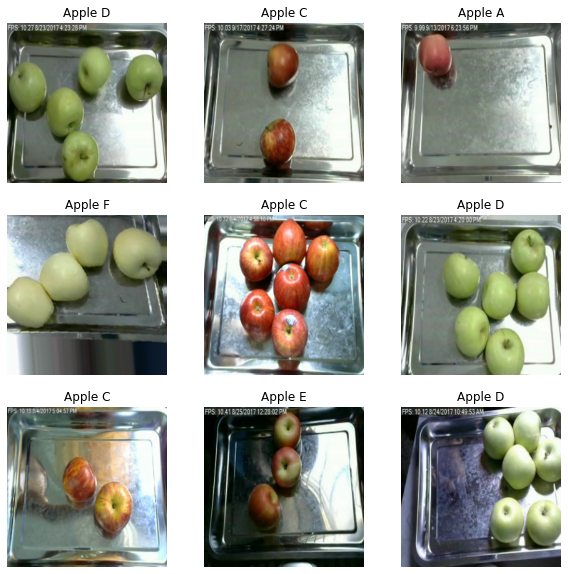

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [ ]:
num_classes = 6
epochs = 4

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[tensorboard]
)

Epoch 1/4
155/155 [==============================] - 558s 3s/step - loss: 0.5436 - accuracy: 0.7983 - val_loss: 0.0752 - val_accuracy: 0.9878
Epoch 2/4
155/155 [==============================] - 40s 249ms/step - loss: 0.0179 - accuracy: 0.9955 - val_loss: 0.0061 - val_accuracy: 0.9976
Epoch 3/4
155/155 [==============================] - 40s 248ms/step - loss: 5.2885e-04 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9984
Epoch 4/4
155/155 [==============================] - 42s 264ms/step - loss: 1.9971e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 0.9984


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
model.count_params()

4220662

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('drive/MyDrive/projekt_dl/')

INFO:tensorflow:Assets written to: drive/MyDrive/projekt_dl/assets


In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1